# TAL aplicado al análisis del discurso de los medios de prensa 📰🤓🔥

El dataset se clasificará en función de las siguientes etiquetas:
- mundo = 0 
- economía = 1 
- política y conflictos = 2 
- ciencia y tecnología = 3
- catástrofes y accidentes = 4 
- cultura y arte = 5 
- deporte = 6 
- ecología y planeta = 7
- crimen, delitos y justicia = 8 
- salud = 9

### Cronograma

- Hito Unidad 2 (27 de octubre): Implementación y experimentos de varios modelos de clasificación

- Hito Proyecto (15 de diciembre): Evaluación y comparación de los modelos de los distintos equipos + integración de los mejores modelos en la arquitectura Sophia2.


In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data manipulation
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataEtiquetada.csv")
df['label'].value_counts()

economía                      2060
ciencia y tecnología          2060
política y conflictos         2060
crimen, delitos y justicia    2060
deporte                       2060
mundo                         2060
ecología y planeta            2060
catástrofes y accidentes      2060
cultura y arte                2020
salud                         1928
Name: label, dtype: int64

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.5)

#### Preprocesamiento y representación vectorial

In [22]:
import spacy
spacy.prefer_gpu()
nlp = spacy.load("es_core_news_sm")
print(spacy.__version__)
import string
from spacy.lang.es.stop_words import STOP_WORDS
from spacy.lang.es import Spanish
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression # Regresion Logística

# Create our list of punctuation marks
punctuations = [".",",","!","?", "#","&","(","-",">","<",")","'","¡","...","¿", "/" ,'"']

# Create our list of stopwords
stop_words= spacy.lang.es.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = Spanish()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [word.lower_ for word in mytokens]
        
    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations]

    # return preprocessed list of tokens
    return mytokens
  

3.2.0


In [23]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
bow_vector

CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7f55c5bb6c10>)

In [24]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

#### entrenamiento del modelo de clasificación

In [25]:
# Logistic Regression Classifier
modelLR = LogisticRegression()

# Create pipeline using Bag of Words
model1 = Pipeline([('preprocessing', bow_vector),
                ('regression-ML', modelLR)])
# model generation
model1.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7f55c5bb6c10>)),
                ('regression-ML', LogisticRegression())])

In [26]:
# Logistic Regression Classifier
modelLR = LogisticRegression()

model2 = Pipeline([('preprocessing', tfidf_vector),
                 ('regression-ML', modelLR)])

# model generation
model2.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7f55c5bb6c10>)),
                ('regression-ML', LogisticRegression())])

#### Evaluación del modelo de clasificación

In [27]:
# Predicting with a test dataset
predicted1 = model1.predict(X_test)
print(predicted1)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted1))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted1, average='micro'))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted1, average='micro'))

['crimen, delitos y justicia' 'salud' 'deporte' ... 'deporte'
 'cultura y arte' 'ciencia y tecnología']
Logistic Regression Accuracy: 0.9302917564127668
Logistic Regression Precision: 0.9302917564127668
Logistic Regression Recall: 0.9302917564127668


In [28]:
# Predicting with a test dataset
predicted2 = model2.predict(X_test)
print(predicted2)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted2))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted2, average='micro'))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted2, average='micro'))

['crimen, delitos y justicia' 'salud' 'deporte' ... 'deporte'
 'cultura y arte' 'ciencia y tecnología']
Logistic Regression Accuracy: 0.8990601135696104
Logistic Regression Precision: 0.8990601135696104
Logistic Regression Recall: 0.8990601135696104


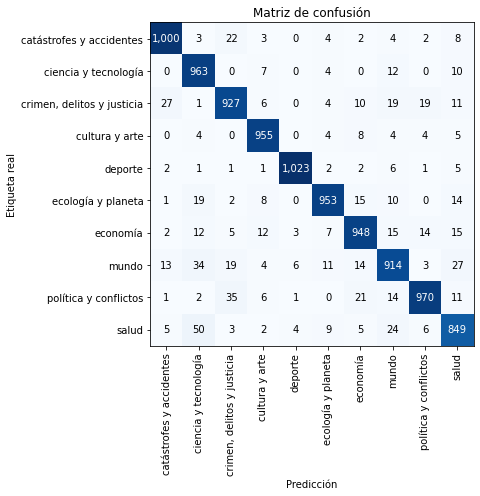

                            precision    recall  f1-score   support

  catástrofes y accidentes      0.951     0.954     0.953      1048
      ciencia y tecnología      0.884     0.967     0.924       996
crimen, delitos y justicia      0.914     0.905     0.910      1024
            cultura y arte      0.951     0.971     0.961       984
                   deporte      0.986     0.980     0.983      1044
        ecología y planeta      0.955     0.932     0.944      1022
                  economía      0.925     0.918     0.921      1033
                     mundo      0.894     0.875     0.884      1045
     política y conflictos      0.952     0.914     0.933      1061
                     salud      0.889     0.887     0.888       957

                  accuracy                          0.930     10214
                 macro avg      0.930     0.930     0.930     10214
              weighted avg      0.931     0.930     0.930     10214



In [29]:
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, labels, cmap=plt.cm.Blues):
    fig, ax = plt.subplots(figsize=(7, 7), tight_layout=True)
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    for i in range(cm.shape[1]):
        for j in range(cm.shape[0]):
            ax.text(j, i, "{:,}".format(cm[i, j]), 
                    horizontalalignment="center", verticalalignment="center",
                    color="white" if cm[i, j] > np.amax(cm)/2 else "black")
    ax.set_title("Matriz de confusión")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation='vertical')
    plt.yticks(tick_marks, labels)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Predicción')
    plt.show()

cm = confusion_matrix(y_true=y_test, y_pred=predicted1)
plot_confusion_matrix(cm, labels=list(df['label'].unique()))
print(classification_report(y_test, predicted1, digits=3))

In [30]:
def printNMostInformative(vectorizer, model, N):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(model.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)

In [31]:
printNMostInformative(bow_vector, modelLR, 20)

Class 1 best: 
(-2.2237170009375524, 'y')
(-1.4813612424890852, '”')
(-1.4421749892517595, '“')
(-0.907365649055344, 'casos')
(-0.8989209075838208, 'eclipse')
(-0.8725473398783331, 'mundo')
(-0.8354753435461632, 'salud')
(-0.797596912153253, 'ataque')
(-0.7797924847779578, 'covid-19')
(-0.766031103762425, 'vacuna')
(-0.743917137928527, 'animales')
(-0.7204618215772327, 'coronavirus')
(-0.7036780108370595, 'países')
(-0.7008553523116695, 'partido')
(-0.6986855752085386, 'trabajadores')
(-0.6970844171950354, 'unidos')
(-0.6699073814260712, 'país')
(-0.6688469131885926, 'grupo')
(-0.6411649238706023, 'agua')
(-0.6357565812648034, 'prisión')
Class 2 best: 
(7.862727249807128, 'incendio')
(5.571865391044234, 'accidente')
(4.774834552826454, 'bomberos')
(3.6896693857306495, 'tránsito')
(3.006286615225405, 'catástrofe')
(2.8609313405991945, 'siniestro')
(2.8536468082332935, 'incendios')
(2.8173857610869106, 'sismo')
(2.303783987324115, 'magnitud')
(2.290048977396934, 'accidentes')
(2.23653643